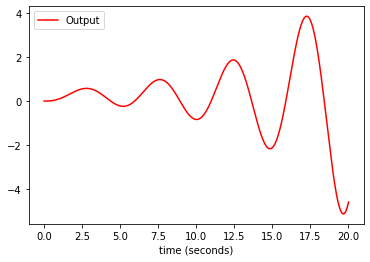

In [3]:
import sys
sys.path.append("../../")
import time

from lib.data.dataplot import *
from lib.utils.time import *

class ThirdOrderSystem:

    def __init__(self):
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0

    def evaluate(self, delta_t, _input):
        new_x3 = (1 - 2 * delta_t) * self.x3 - delta_t * self.x2 - 4 * delta_t * self.x1 +  delta_t * _input
        new_x2 = self.x2 + delta_t * self.x3
        new_x1 = self.x1 + delta_t * self.x2

        self.x1 = new_x1
        self.x2 = new_x2
        self.x3 = new_x3

        return self.x1

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")

s = ThirdOrderSystem()
u = 1

t = Time()
t.start()
while t.get() < 20:

    time.sleep(0.01)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)

dp.plot()